# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [46]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
# Your code here.
student_data = pd.DataFrame({'ID':[i for i in range(1,11)],
                             'Age': [17,51,27,21,36,48,19,26,54,30],
                             'Tardies': [10,1 ,5 ,9 ,4 ,2 ,9 ,6 ,0 ,3]})
student_data

,ID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

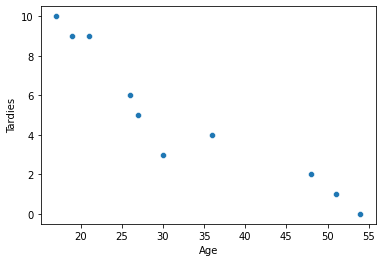

In [9]:
# Your code here.
sns.scatterplot(data=student_data, x="Age", y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
"""
They present a negative correlation
"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.
#correlation:
print(student_data["Age"].corr(student_data["Tardies"]))
#covariance:
print(student_data["Age"].cov(student_data["Tardies"]))

# Correlation is an abstract concept pertaining variable relationships. 
# In particular the extent to which a change in one corresponds to a change in another.
# Covariance is a measure of correlation which is dependent on the units of the variables.
# Correlation, as measured by a coefficient becomes a practical concept. It is a a covariance scaled to have -1 to 1 boundaries.

# It is though to interpret a covariance. 
# You can say that the relationship between the two variables is negative.
# You can also sort of infer by the magnitude that the scales of the two variables are a bit different,
# but you should really be interpreting the correlation coefficient instead.

# Given the coefficient is almost -1 you could say that in the vast majority of cases an increase in one variable
# Will correspond to a decrease in the other one.

-0.9391626886887122
-45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here.
Y = student_data["Tardies"]
X = student_data["Age"]
X = sm.add_constant(X)

results = sm.OLS(Y, X, hasconst = True).fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           5.57e-05
Time:                        13:14:32   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
stats.linregress(student_data["X"],student_data["Y"])
# Linear Regression.
# An increase of 1 in X leads to a decrease of 0.2428... on Y.

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

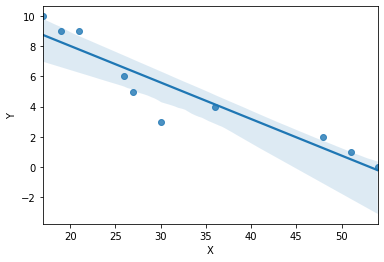

In [29]:
# Your code here.
sns.regplot(x=student_data["X"], y=student_data["Y"])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

# Not high r given that the model has only one independent variable. // Not low p-value either.
# Super simple model with one variable, unlikely to all logical explanatory variables.
# The model itself is not good, that does not mean that age is not a relevant explanatory variable for a 
# potential model which may work, actually the correlation was very encouraging.
# The thing is that an OLS model with one variable 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need & the data
url = 'https://raw.githubusercontent.com/rui-pduarte/lab-regression-analysis/master/your-code/vehicles.csv'
vehicles_DF = pd.read_csv(url)
vehicles_DF

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

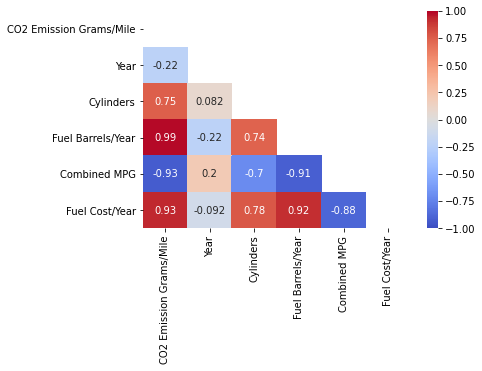

In [18]:
# Your response here. 
X = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
Y = ['CO2 Emission Grams/Mile']
Y_and_Xs = Y + X

corrMatrix = vehicles_DF[Y_and_Xs].corr()
mask = np.zeros(corrMatrix.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm", vmin = -1, vmax = 1, center = 0, mask = mask)
plt.show()

### Variables with correlations near to 1 and -1 may be the best.
### Ideally we also have correlations between themselves close to zero to get away from multicollinearity.
### Fuel Barrels/Year seems fine, but in general this dataset seems to have some high correleation among every variable

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here. 
X = vehicles_DF[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles_DF['CO2 Emission Grams/Mile']
X = sm.add_constant(X)

model = sm.regression.linear_model.OLS(Y,X) 
results = model.fit()
print(results.summary())
### Linear regression, minimizing square deviations.

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                             13:16:33   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [1]:
# Your response here.

# Everything else constant, variable [X], has a [coef] impact on CO2 Emission Grams/Mile.
 # X, [coef]:
 # Year                 -0.3206      
 # Cylinders             1.8788    
 # Fuel Barrels/Year    19.0529   
 # Combined MPG         -3.0404     
 # Fuel Cost/Year        0.0323      

# The Skewness and Kurtosis tell us that we are far aware from a normal distribution.

# As discussed above, this model looks amazing having a glance at R2 and at p-values, but might have some issues, particularly if taken out of a descriptive setting to a predictive one.
# The R2 is super high and some variables despite having a high correlation with Y, are very correlated with each other.
# Fuel cost and fuel barrels track very similar things, maybe they could be taken out.
# Having the year as an explanatory variable and not in dummies accounts for trends, but does not allow the model to absorb particular events that might have influenced each of the production years to a variable.
# I'm fine with letting it be like this for now, and the most relevant variable could be Fuel Barrels/Year.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
# Your code here.
parties_data = pd.DataFrame({'Invited':   [1,3,4,6,8,9,11,14],
                             'Attending': [1,2,4,4,5,7,8 ,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

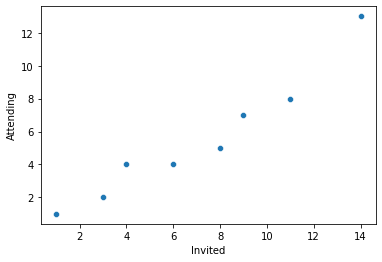

In [26]:
# Your code here.
sns.scatterplot(data=parties_data, x="Invited", y="Attending")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
### It is positive, which is a bit meaningless, because they are by construction very correlated.
### There is no way that people go without being invited.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 
### No outliers whatsoever since this data should most likely be interpered as a % (meaning Y/X).

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
### I do not agree with the intention of the question above.
### Yet, the linear reg would fit better after taking the "outlier" out.
### Without doing the % you can have data that will fit a curve that "predicts" 
### That for a certain number of invitees attendees are above!
### I sort of refuse doing it like that.